# data from external source kaggle


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
#讀kaggle上載下來的資料
data=pd.read_csv('d:/diabetes.csv')
print('dataset shape{}'.format(data.shape))
data.head()

dataset shape(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
#看看每一類是否均衡 顯然否
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [19]:
X=data.iloc[:,0:8]
Y=data.iloc[:,8]
print('shape of X {}, shape of Y {}'.format(X.shape,Y.shape))

shape of X (768, 8), shape of Y (768,)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [21]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=2,weights="distance")))
models.append(("Radius Neighbors",RadiusNeighborsClassifier(n_neighbors=2,radius=500.0)))

In [22]:
results=[]
for name,model in models:
    model.fit(X_train,Y_train)
    results.append((name,model.score(X_test,Y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))

name: KNN; score: 0.7532467532467533
name: KNN with weights; score: 0.6948051948051948
name: Radius Neighbors; score: 0.7012987012987013


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data=pd.read_csv('d:/diag_surg_complic.csv')
print('dataset shape{}'.format(data.shape))
data.head()

dataset shape(563, 12)


,Unnamed: 0,time_diag_surg,bleeding,heartburn,fever,infection,pain,nausea,confusion,high_blood_pressure,shock,thrombosis
0,1,126.114213,0,0,1,1,1,0,0,1,0,1
1,2,40.385357,0,1,0,0,1,0,0,1,0,0
2,3,3.388627,0,0,1,0,0,0,0,1,0,0
3,4,32.400896,0,0,0,1,0,0,0,0,0,1
4,5,161.934076,0,0,1,0,1,0,0,0,0,0


In [42]:
data.groupby('thrombosis').size()

thrombosis
0    408
1    155
dtype: int64

In [43]:
X=data.iloc[:,1:11]
Y=data.iloc[:,11]
print('shape of X {}, shape of Y {}'.format(X.shape,Y.shape))

shape of X (563, 10), shape of Y (563,)


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [45]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=2,weights="distance")))
models.append(("Radius Neighbors",RadiusNeighborsClassifier(n_neighbors=2,radius=500.0)))

In [47]:
results=[]
for name,model in models:
    model.fit(X_train,Y_train)
    results.append((name,model.score(X_train,Y_train)))
    results.append((name,model.score(X_test,Y_test)))
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))

name: KNN; score: 0.8022222222222222
name: KNN; score: 0.6991150442477876
name: KNN with weights; score: 1.0
name: KNN with weights; score: 0.6106194690265486
name: Radius Neighbors; score: 0.7177777777777777
name: Radius Neighbors; score: 0.7522123893805309


# normalization
regression = minimize loss function
我們用梯度(算斜率)來找最小loss

為甚麼要normalize?
當一個variable他的range遠大於另一個
這樣即使小range改變了20%對大range而言幾乎沒差
所以改成range都是介於0~1 這樣大家都一樣了

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [51]:
n_dots = 200
X = np.linspace(-2*np.pi,2*np.pi,n_dots)
Y = np.sin(X)+0.2*np.random.rand(n_dots)-0.1
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    #你要找幾次多項式
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    #這裡做normalize
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
    return pipeline

In [53]:
from sklearn.metrics import mean_squared_error
degrees = [2,3,5,10]
results=[]
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(X,Y)
    train_score=model.score(X,Y)
    mse = mean_squared_error(Y,model.predict(X))
    results.append({"model":model,"degree":d,"score":train_score,"mse":mse})
for r in results:
    print("degree :{}, score :{}, mse :{}".format(r["degree"],r["score"],r["mse"]))
    

degree :2, score :0.14008695678154037, mse :0.43143615338433106
degree :3, score :0.2666122059824454, mse :0.36795581981836556
degree :5, score :0.898434991766275, mse :0.05095726459364117
degree :10, score :0.9939950398974698, mse :0.0030128126422706417


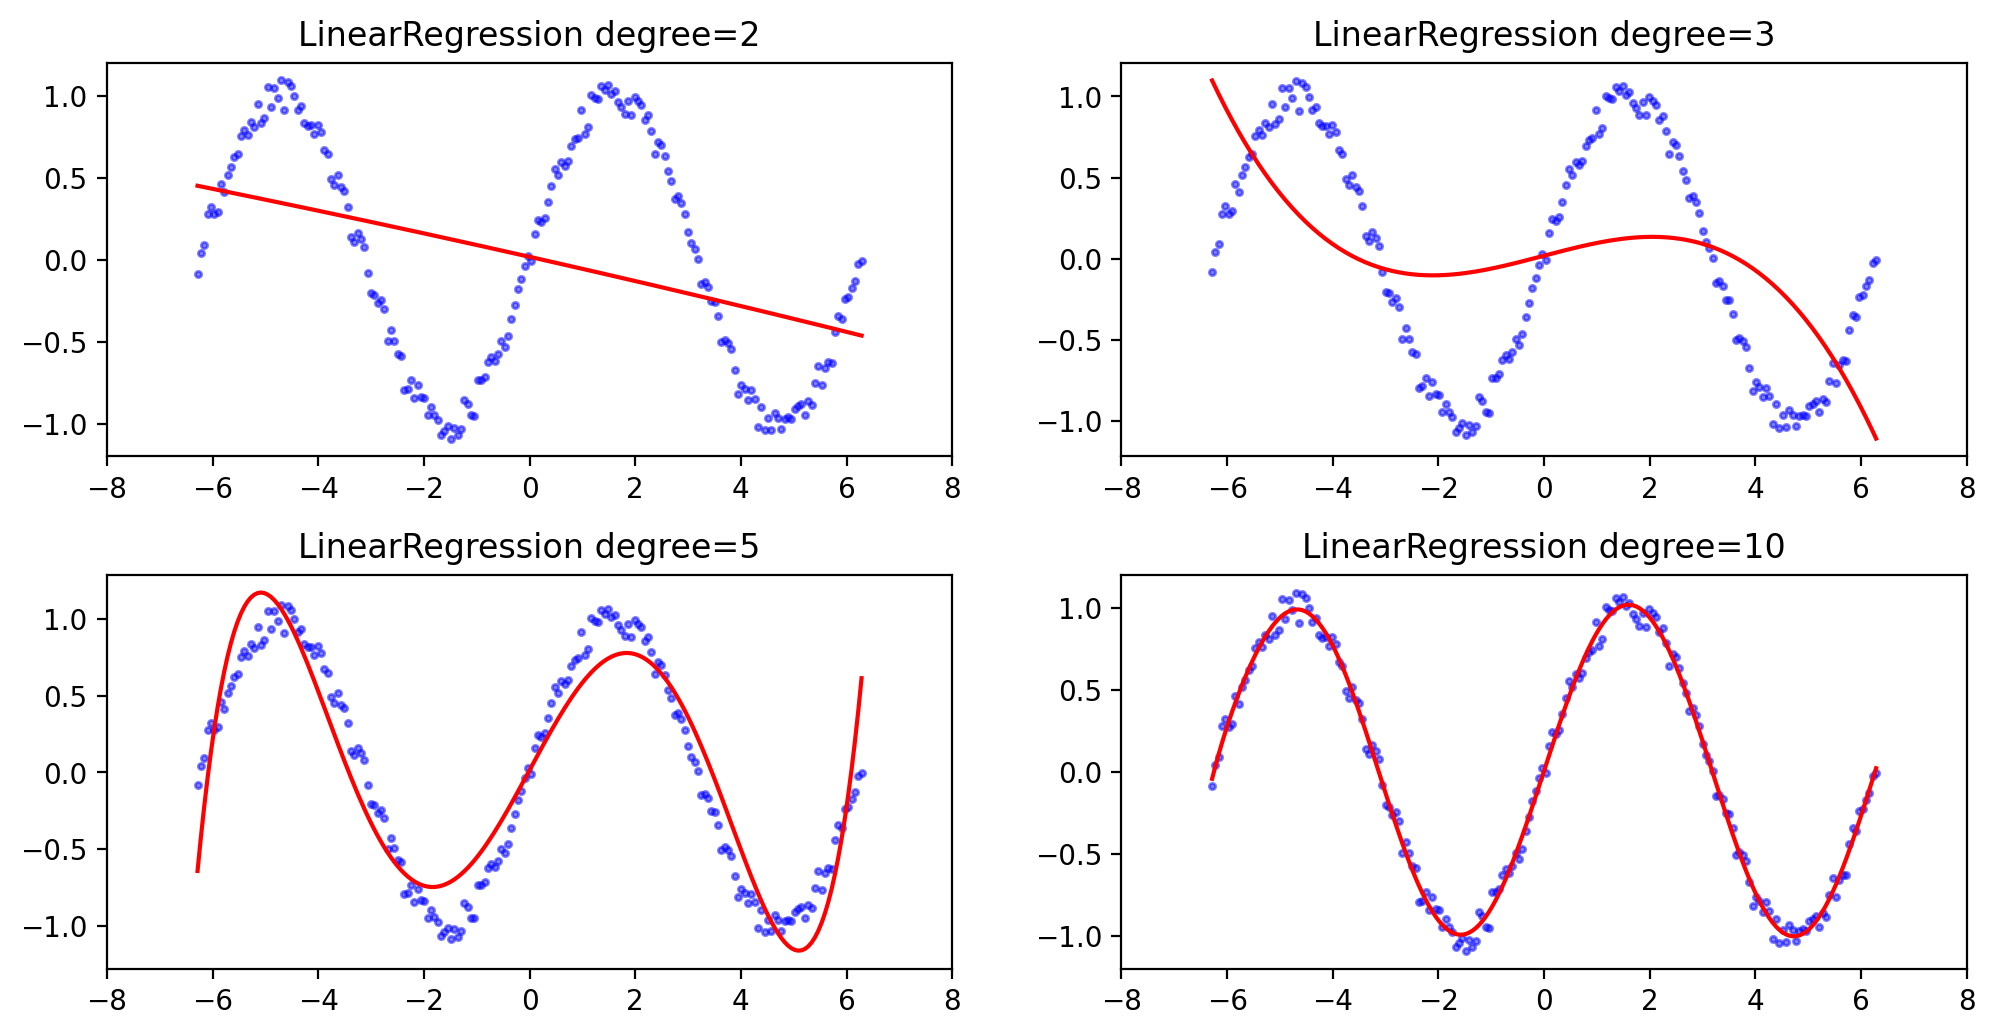

In [54]:
from matplotlib.figure import SubplotParams
plt.figure(figsize=(12,6),dpi = 200,subplotpars=SubplotParams(hspace=0.3))
for i, r in enumerate(results):
    fig = plt.subplot(2,2,i+1)
    plt.xlim(-8,8)
    plt.title("LinearRegression degree={}".format(r["degree"]))
    plt.scatter(X,Y,s=5,c='b',alpha=0.5)
    plt.plot(X,r["model"].predict(X),'r-')

In [55]:
#應用到boston house price
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [56]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
X.shape

(506, 13)

In [57]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [58]:
#了解表的欄位
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 3)

In [62]:
import time
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
cv_score = model.score(X_test, y_test)
print('train_score: {}, cv_score{}'.format(train_score,cv_score))
#但這個分數很低欸

train_score: 0.7239410298290111, cv_score0.7952617563243877


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    #他有normalization
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
    return pipeline
model = polynomial_model(degree=2)
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
cv_score = model.score(X_test, y_test)
print('train_score: {}, cv_score{}'.format(train_score,cv_score))

train_score: 0.9305468799409317, cv_score0.8600492818188921


In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv('d:/Salary_Data.csv')
data.head()



,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [100]:
X=data.iloc[:,0:1]
Y=data.iloc[:,1]

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
    return pipeline
model = polynomial_model(degree=2)
model.fit(X_train,Y_train)
train_score=model.score(X_train,Y_train)
test_score = model.score(X_test, Y_test)
print('train_score: {}, test_score: {}'.format(train_score,cv_score))

train_score: 0.9630710409999172, test_score: 0.8938756209664745


# unlabel data
沒有答案的data
用k-mean
可以是2-mean 3-mean
給定k叫他幫你分k組

隨便定k個特殊點 然後對於每個資料點算他跟特殊點的距離
他跟哪個特殊點最近就把他設成那一組

然後把同一組的center算出來
再根據這k個center 重新算距離跟分組
一直重複這件事
直到不再改變

如果cost很高就表示不太優

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [104]:
from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=200,n_features=2,centers=4,random_state=1,cluster_std=1,center_box=(-10.0,10.0),shuffle=True)

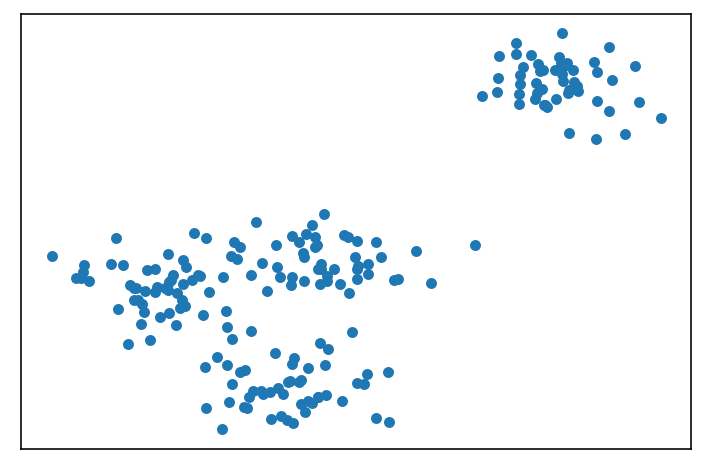

In [105]:
plt.figure(figsize=(6,4),dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[:,0],X[:,1],s=20,marker='o')

In [106]:
from sklearn.cluster import KMeans
n_clusters=3
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X)
print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(X))))

kmean: k=3, cost=-668


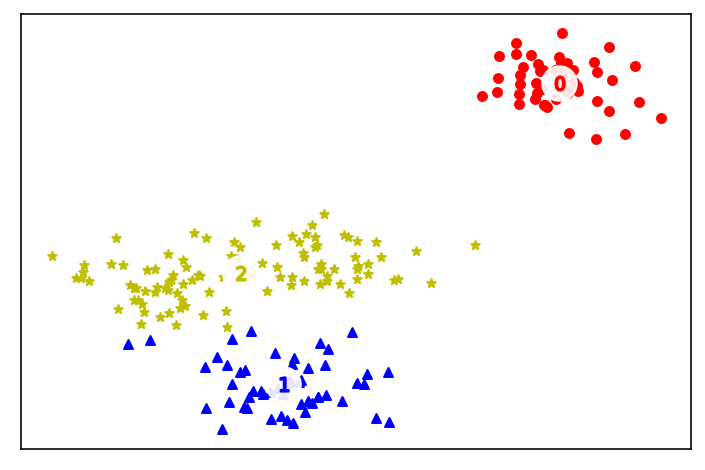

In [107]:
labels = kmean.labels_
centers = kmean.cluster_centers_
markers = ['o','^','*']
colors =['r','b','y']

plt.figure(figsize=(6,4),dpi=144)
plt.xticks(())
plt.yticks(())

for c in range(n_clusters):
    cluster = X[labels==c]
    plt.scatter(cluster[:,0],cluster[:,1],s=20,marker=markers[c],c=colors[c])
plt.scatter(centers[:,0],centers[:,1],s=300,marker='o',c='white',alpha=0.9)
for i,c in enumerate(centers):
    plt.scatter(c[0],c[1],marker='$%d$'%i, s=50,c=colors[i])

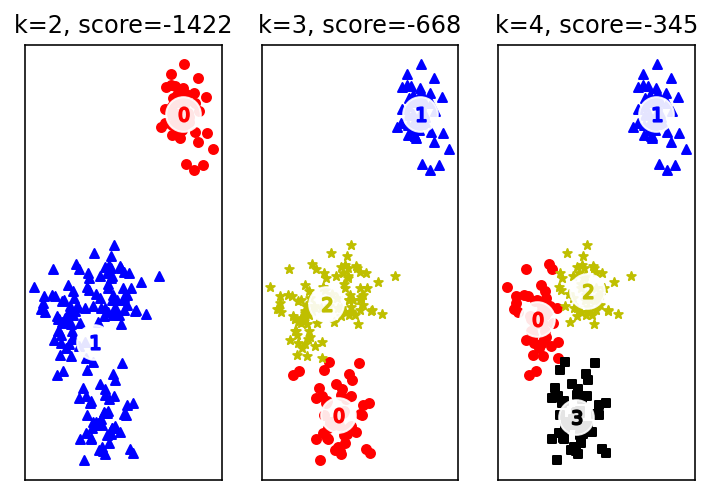

In [108]:
def fit_plot_kmean_model(n_clusters,X):
    plt.xticks(())
    plt.yticks(())
    
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_predict(X)
    
    labels = kmean.labels_
    centers = kmean.cluster_centers_
    markers = ['o','^','*','s']
    colors =['r','b','y','k']

    score = kmean.score(X)
    plt.title("k={}, score={}".format(n_clusters,(int)(score)))

    for c in range(n_clusters):
        cluster = X[labels==c]
        plt.scatter(cluster[:,0],cluster[:,1],s=20,marker=markers[c],c=colors[c])
    plt.scatter(centers[:,0],centers[:,1],s=300,marker='o',c='white',alpha=0.9)
    for i,c in enumerate(centers):
        plt.scatter(c[0],c[1],marker='$%d$'%i, s=50,c=colors[i])
        
from sklearn.cluster import KMeans
n_clusters=[2,3,4]
plt.figure(figsize=(6,4),dpi=144)
for i,c in enumerate(n_clusters):
    plt.subplot(1,3,i+1)
    fit_plot_kmean_model(c,X)

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets #內建資料集

In [122]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

kmean: k=3, cost=-31


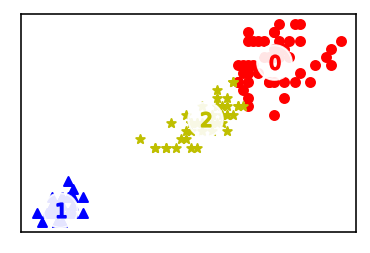

In [123]:
from sklearn.cluster import KMeans
n_clusters=3
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X)
print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(X))))
labels = kmean.labels_
centers = kmean.cluster_centers_
markers = ['o','^','*']
colors =['r','b','y']

plt.figure(figsize=(3,2),dpi=144)
plt.xticks(())
plt.yticks(())

for c in range(n_clusters):
    cluster = X[labels==c]
    plt.scatter(cluster[:,0],cluster[:,1],s=20,marker=markers[c],c=colors[c])
plt.scatter(centers[:,0],centers[:,1],s=300,marker='o',c='white',alpha=0.9)
for i,c in enumerate(centers):
    plt.scatter(c[0],c[1],marker='$%d$'%i, s=50,c=colors[i])

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_csv('d:/Mall_Customers.csv')
print('dataset shape{}'.format(data.shape))
data.head()


dataset shape(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
X=data.iloc[:,3:5].values
print('shape of X {}'.format(X.shape))

shape of X (200, 2)


kmean: k=7, cost=-30241


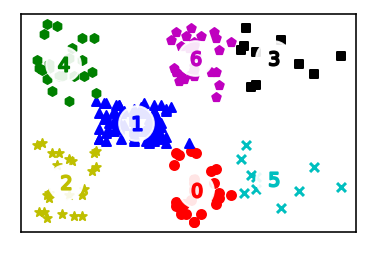

In [120]:
from sklearn.cluster import KMeans
n_clusters=7
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X)
print("kmean: k={}, cost={}".format(n_clusters, int(kmean.score(X))))
labels = kmean.labels_
centers = kmean.cluster_centers_
markers = ['o','^','*','s','h','x','p']
colors =['r','b','y','k','g','c','m']

plt.figure(figsize=(3,2),dpi=144)
plt.xticks(())
plt.yticks(())

for c in range(n_clusters):
    cluster = X[labels==c]
    plt.scatter(cluster[:,0],cluster[:,1],s=20,marker=markers[c],c=colors[c])
plt.scatter(centers[:,0],centers[:,1],s=300,marker='o',c='white',alpha=0.9)
for i,c in enumerate(centers):
    plt.scatter(c[0],c[1],marker='$%d$'%i, s=50,c=colors[i])

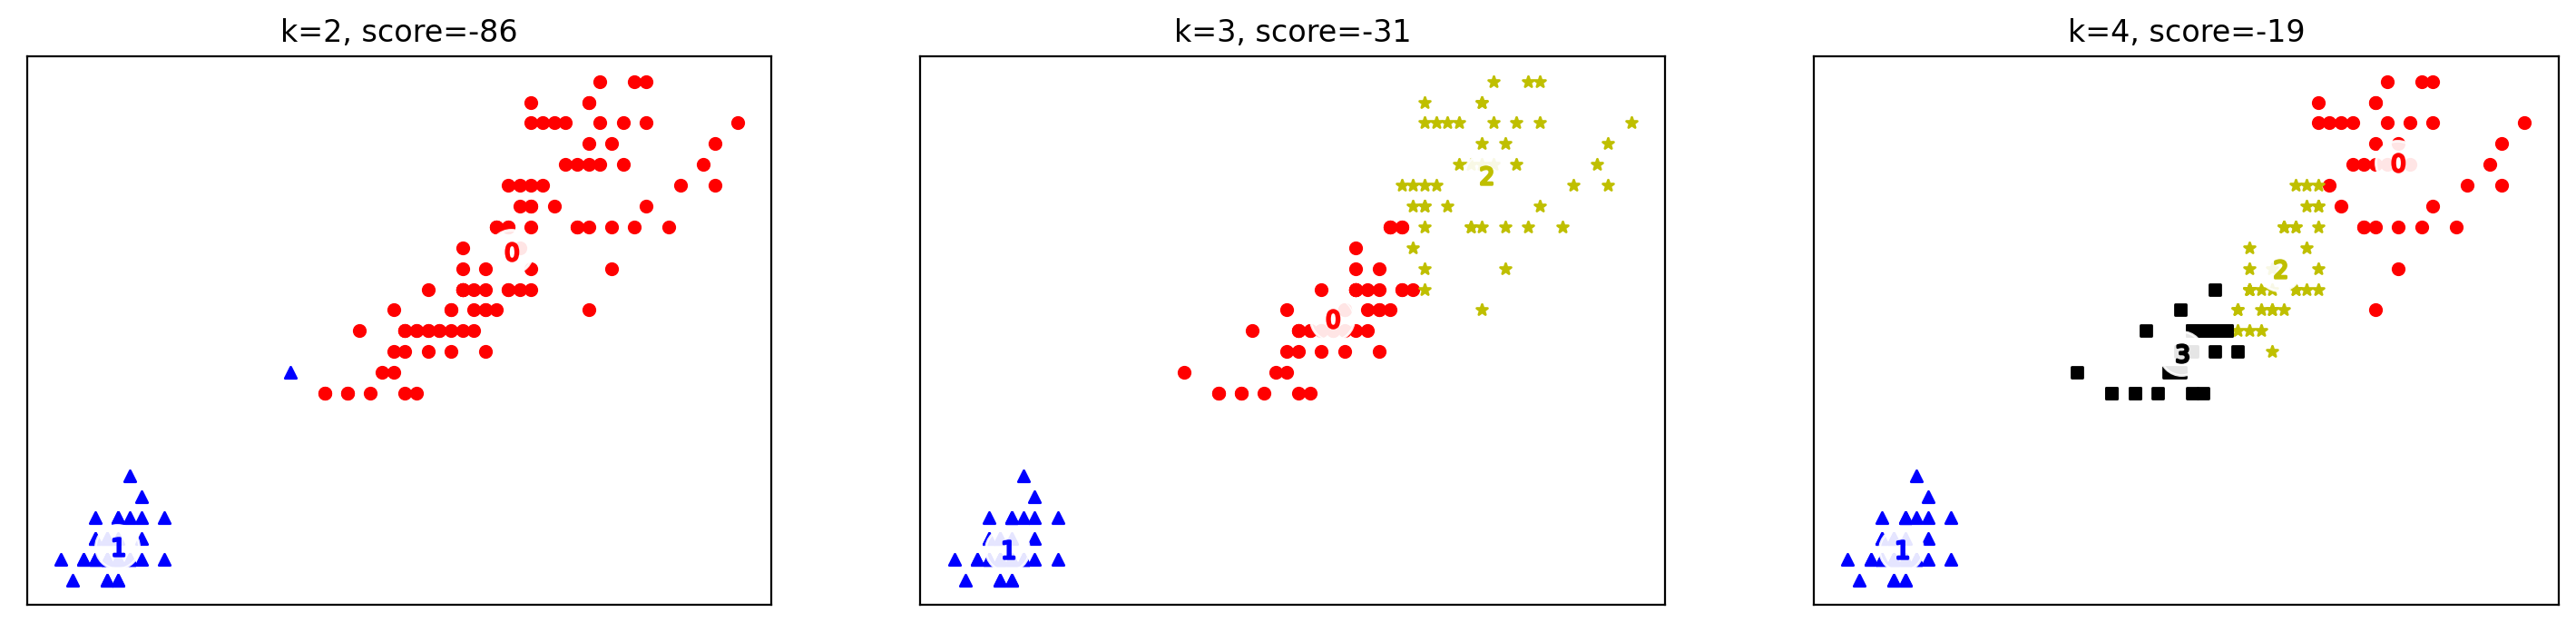

In [124]:
def fit_plot_kmean_model(n_clusters,X):
    plt.xticks(())
    plt.yticks(())
    
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_predict(X)
    
    labels = kmean.labels_
    centers = kmean.cluster_centers_
    markers = ['o','^','*','s','h','x','p']
    colors =['r','b','y','k','g','c','m']

    score = kmean.score(X)
    plt.title("k={}, score={}".format(n_clusters,(int)(score)))

    for c in range(n_clusters):
        cluster = X[labels==c]
        plt.scatter(cluster[:,0],cluster[:,1],s=20,marker=markers[c],c=colors[c])
    plt.scatter(centers[:,0],centers[:,1],s=300,marker='o',c='white',alpha=0.9)
    for i,c in enumerate(centers):
        plt.scatter(c[0],c[1],marker='$%d$'%i, s=50,c=colors[i])
        
from sklearn.cluster import KMeans
n_clusters=[2,3,4]
plt.figure(figsize=(18,4),dpi = 200,subplotpars=SubplotParams(hspace=0.3))
for i,c in enumerate(n_clusters):
    plt.subplot(1,3,i+1)
    fit_plot_kmean_model(c,X)


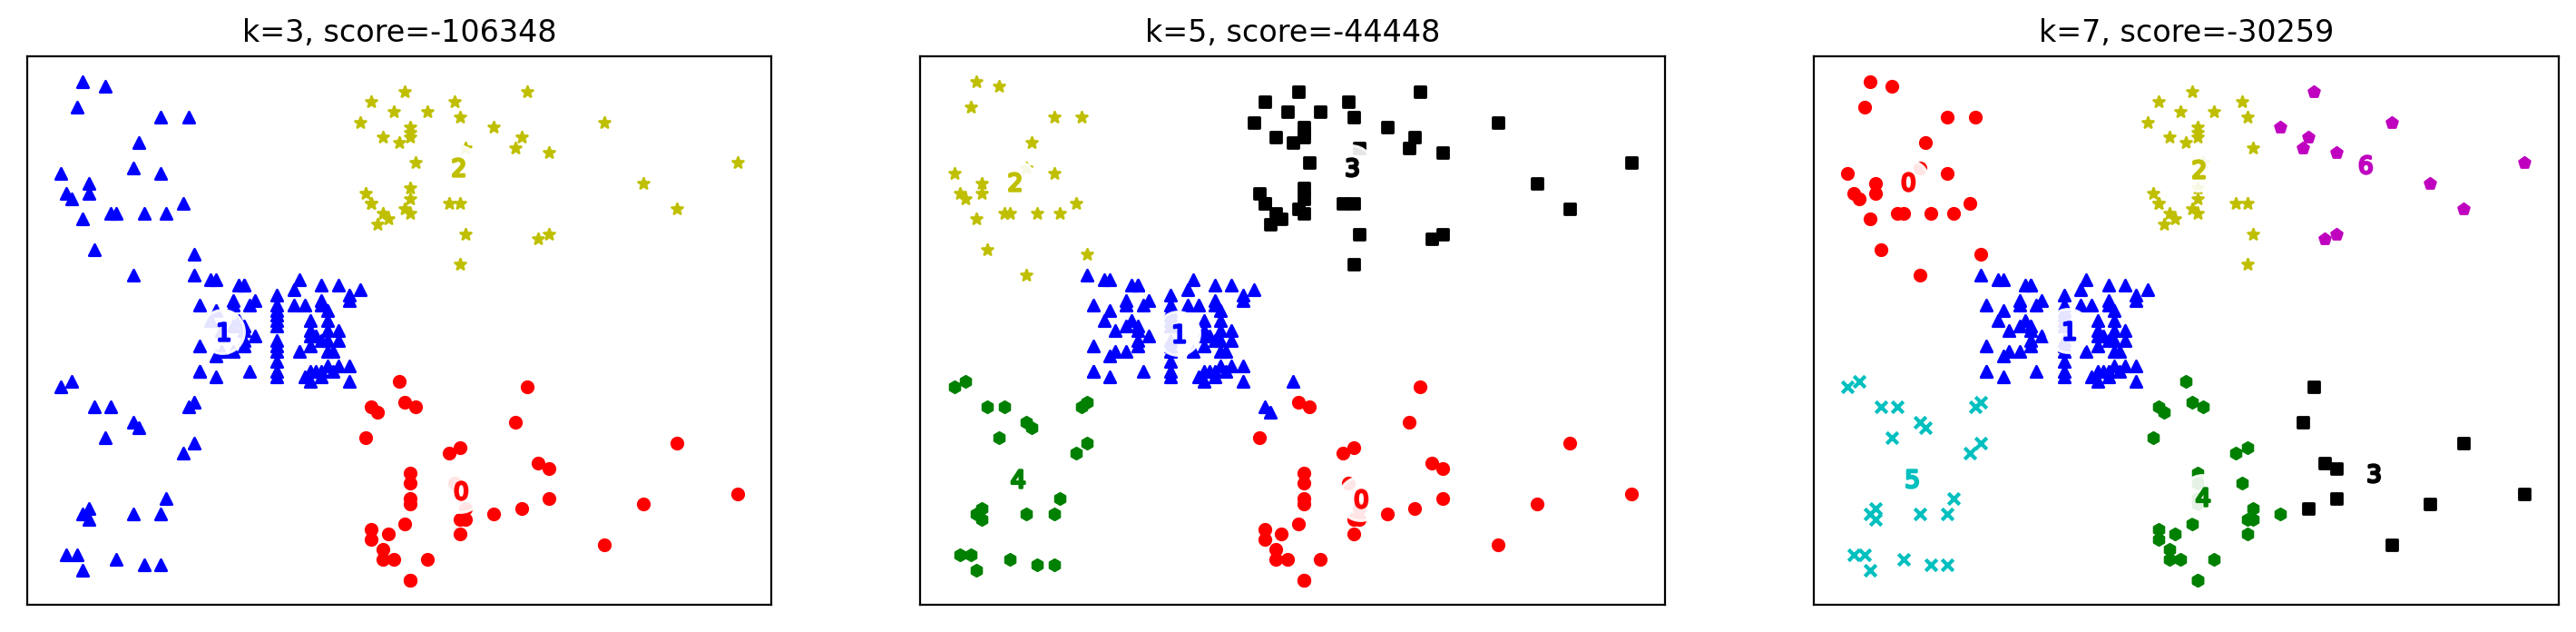

In [218]:
def fit_plot_kmean_model(n_clusters,X):
    plt.xticks(())
    plt.yticks(())
    
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_predict(X)
    
    labels = kmean.labels_
    centers = kmean.cluster_centers_
    markers = ['o','^','*','s','h','x','p']
    colors =['r','b','y','k','g','c','m']

    score = kmean.score(X)
    plt.title("k={}, score={}".format(n_clusters,(int)(score)))

    for c in range(n_clusters):
        cluster = X[labels==c]
        plt.scatter(cluster[:,0],cluster[:,1],s=20,marker=markers[c],c=colors[c])
    plt.scatter(centers[:,0],centers[:,1],s=300,marker='o',c='white',alpha=0.9)
    for i,c in enumerate(centers):
        plt.scatter(c[0],c[1],marker='$%d$'%i, s=50,c=colors[i])
        
from sklearn.cluster import KMeans
n_clusters=[3,5,7]
plt.figure(figsize=(18,4),dpi = 200,subplotpars=SubplotParams(hspace=0.3))
for i,c in enumerate(n_clusters):
    plt.subplot(1,3,i+1)
    fit_plot_kmean_model(c,X)

# 傳統ml的問題
SVM decision tree 他的分類只適合線性
使用nueral network
他會將input 加權然後得到他的output
output要轉成one hot

NN是layer design
model.seqential 準備好
model.add加入第一層
使用crossentropy算loss function